# World Happiness Report Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# Statistic summary

In [3]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


The choice of Dystopia as a benchmark permits every real country to have a positive contribution from each of the six factors.

# data types

In [4]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

data type is object

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.shape

(158, 12)

# Checking Null Values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

# checking Missing values

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

<Axes: >

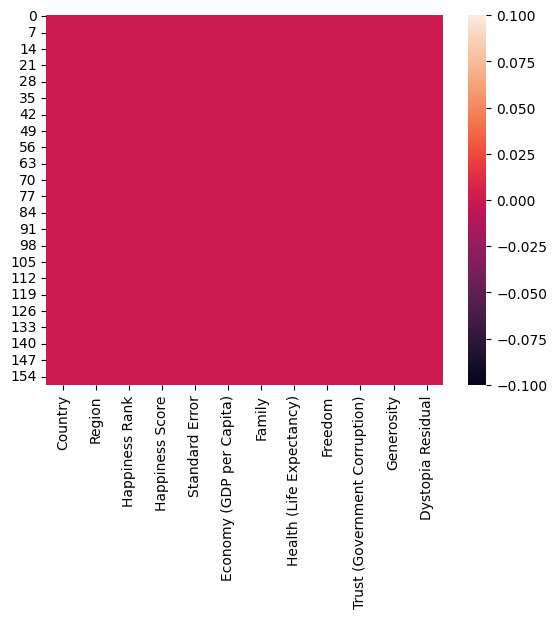

In [9]:
sns.heatmap(df.isnull())

There is no missing values in dataset.

From df.describe() we can see that for some countries min values are 0. so let try to find country at bottom in respective category.

In [10]:
df.loc[df["Health (Life Expectancy)"]==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
122,Sierra Leone,Sub-Saharan Africa,123,4.507,0.07068,0.33024,0.95571,0.0,0.4084,0.08786,0.21488,2.51009


In [11]:
df.loc[df["Economy (GDP per Capita)"]==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
119,Congo (Kinshasa),Sub-Saharan Africa,120,4.517,0.0368,0.0,1.0012,0.09806,0.22605,0.07625,0.24834,2.86712


In [12]:
df.loc[df["Freedom"]==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
111,Iraq,Middle East and Northern Africa,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


In [13]:
df.loc[df["Family"]==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
147,Central African Republic,Sub-Saharan Africa,148,3.678,0.06112,0.0785,0.0,0.06699,0.48879,0.08289,0.23835,2.7223


In [14]:
df.loc[df["Trust (Government Corruption)"]==0.0]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
73,Indonesia,Southeastern Asia,74,5.399,0.02596,0.82827,1.08708,0.63793,0.46611,0.0,0.51535,1.86399


# Minimum Performance category wise

1. Health (Life Expectancy)- Sierra Leone
2. Economy (GDP per capita)- Congo(Kinshasa)
3. Freedom - Iraq
4. Family - Central African Republic
5. Trust (Government Corruption) - Indonesia

# Making new dataframe considering numerical datatypes for further investigation.

In [15]:
Happy_df = df[df.columns[3:]]
Happy_df

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [16]:
Happy_df.shape

(158, 9)

There is no missing values in data.

In [17]:
X=Happy_df.drop(columns=["Happiness Score"])
Y=Happy_df["Happiness Score"]

# Skewness detection using displot and skew()

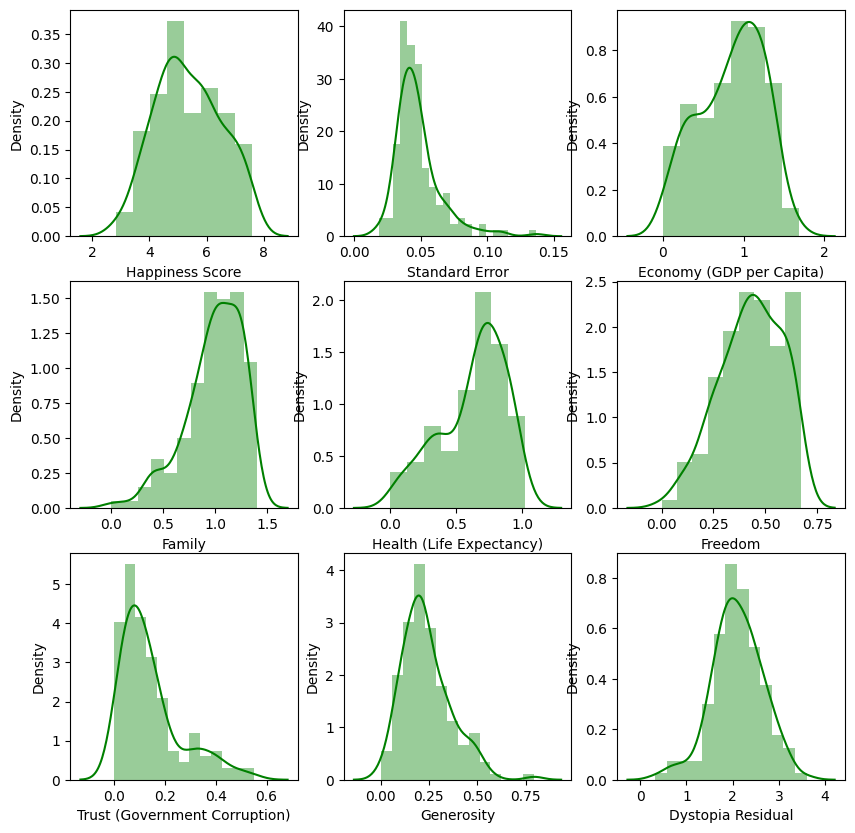

In [18]:
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1
for column in Happy_df:
    if plotnumber <=9:
       ax = plt.subplot(3,3,plotnumber)
       sns.distplot(Happy_df[column], color='g')
       plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [19]:
Happy_df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

We can see that Standard Error, Trust, Generosity are right skewed distribution.As we know Log transform is useful if and only if the distribution of the variable is right-skewed. A log transformaion in a left-skewed distribution will tend to make it even more left skew. Family variable has left skewed distribution.

In [20]:
from scipy.stats import boxcox

In [21]:
Happy_df['Standard Error']=boxcox(Happy_df['Standard Error'],0)

In [22]:
from scipy.stats import boxcox

In [23]:
Happy_df.skew()

Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Hitplot

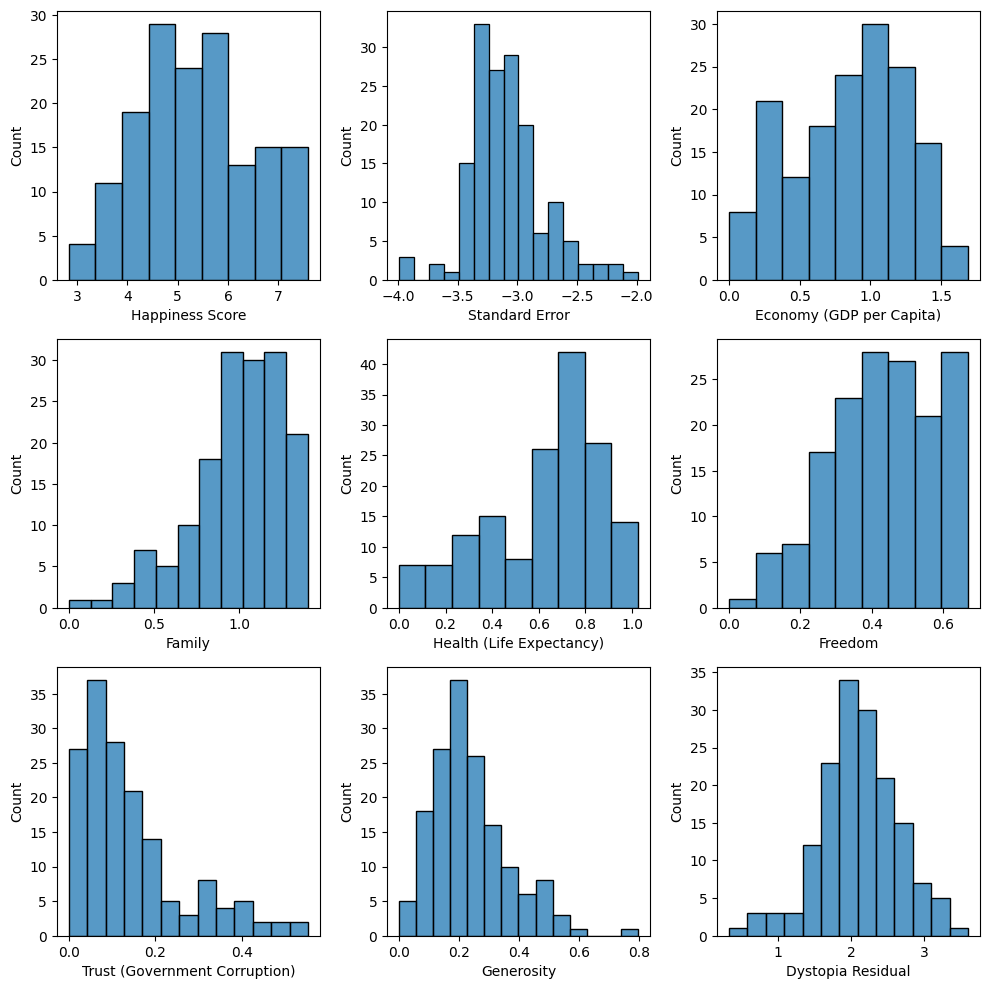

In [24]:
plt.figure(figsize=(10,10), facecolor = 'white')
plotnumber=1
for column in Happy_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.histplot(Happy_df[column], palette="Rainbow")
        plt.xlabel(column,fontsize = 10)
    plotnumber+=1
plt.tight_layout()
plt.show()

# Pairplot

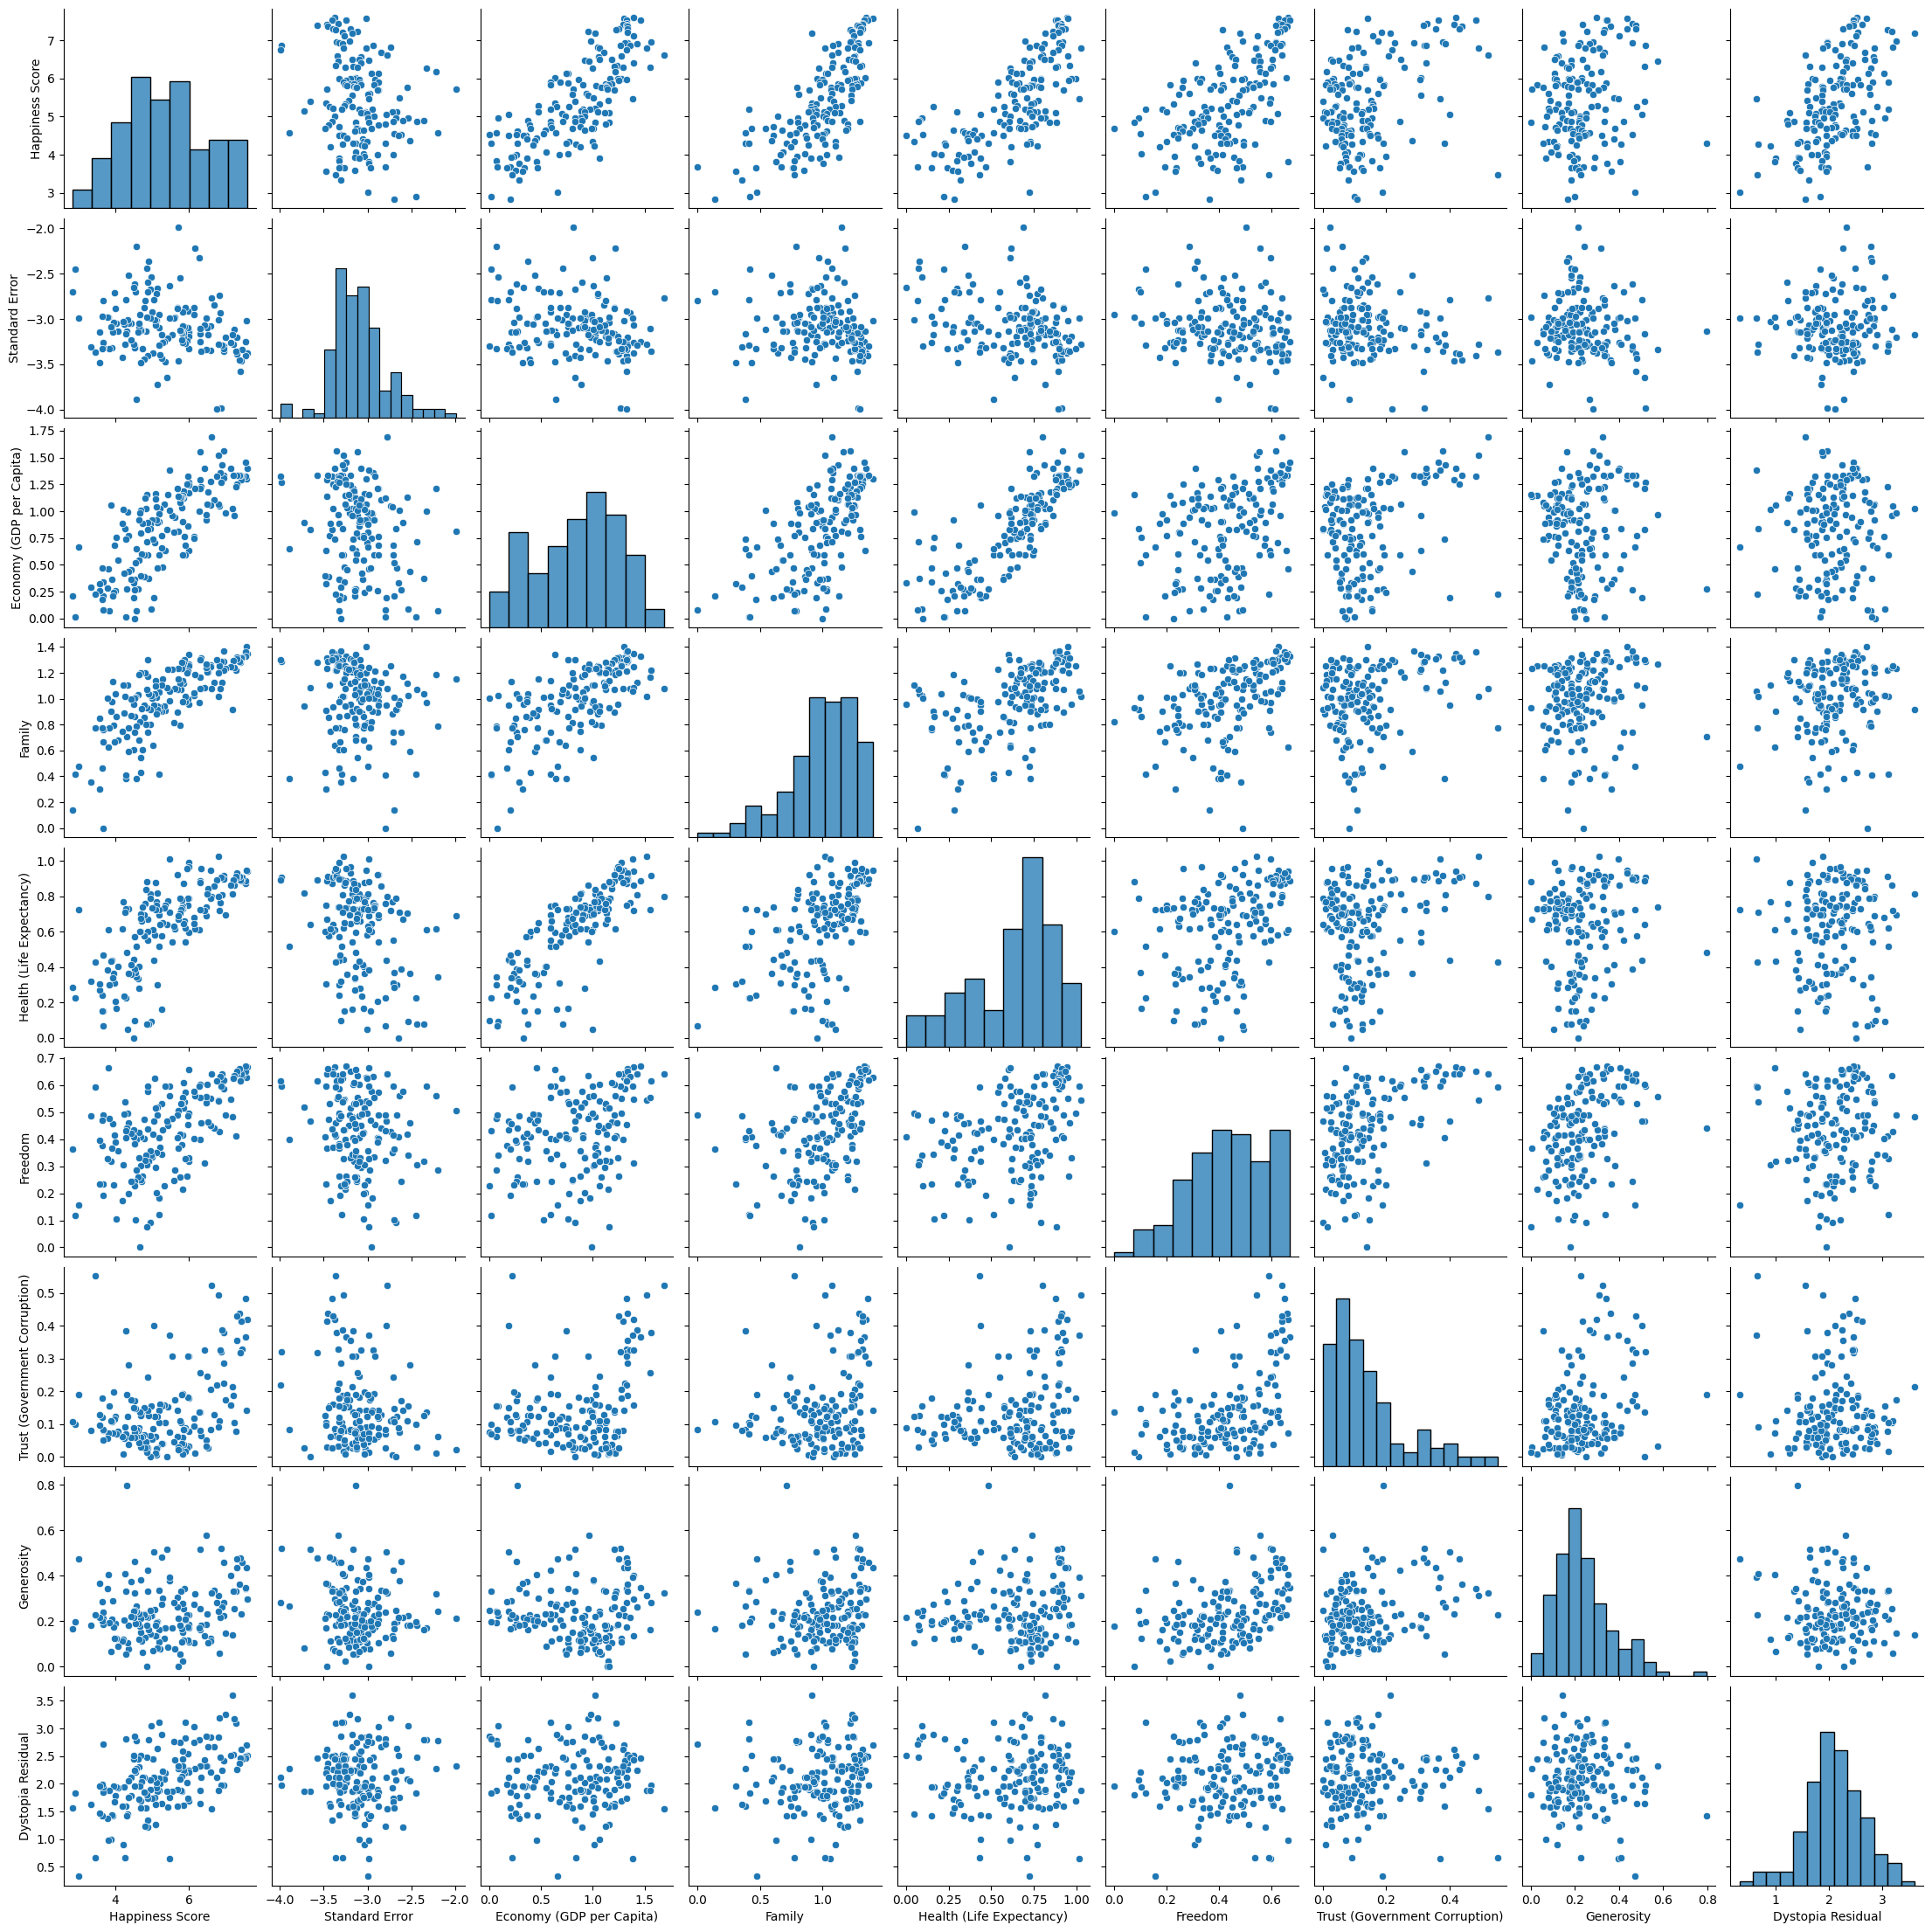

In [25]:
sns.pairplot(Happy_df, palette = 'viridis')

# Investingating Correlation between features

In [26]:
Happy_df.corr()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.210296,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.210296,1.000000,-0.223477,-0.133812,-0.320471,-0.171718,-0.187226,-0.124805,0.052531
Economy (GDP per Capita),0.780966,-0.223477,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.133812,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.320471,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.171718,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.187226,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.124805,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.052531,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<Axes: >

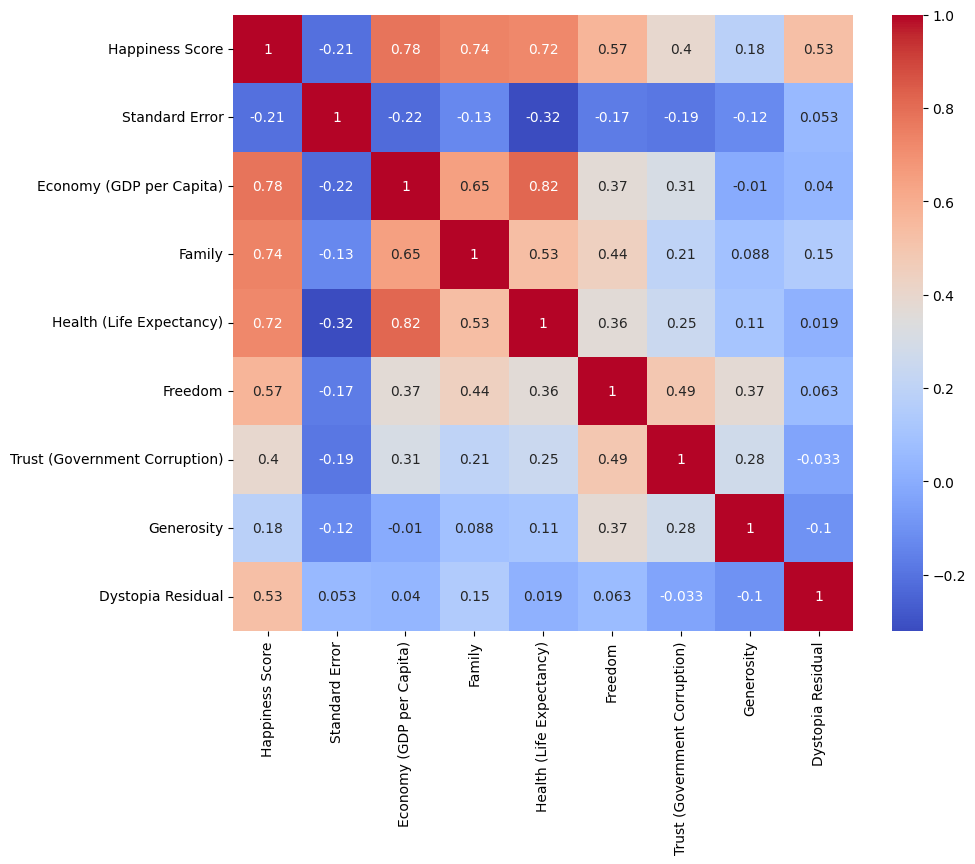

In [27]:
corr_df = Happy_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_df, annot = True , cmap='coolwarm')

In [28]:
a = df.sort_values(by='Happiness Score', ascending= False).head(10)
a

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can see that Switzerland Top the chart with Happiness score of 7.587. We can see that 8 countries out of 10 are from Western Europe

# Bottom 10 countries happiest countries based on Happiness rank/score

In [29]:
b= df.sort_values(by='Happiness Score', ascending=True).head(10)
b

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296


We can see that chad from Sub-saharan Africa. Top the  chart with Hapiness score of 7.587. We can see that 8 countries out of Bottom 10 are from Sub-Saharan Africa.

In [30]:
Grp_Region=df.groupby('Region')
Grp_Region['Happiness Score'].describe().sort_values(by='mean', ascending = True).head(10)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Sub-Saharan Africa,40.0,4.202800,0.609557,2.839,3.75600,4.272,4.58075,5.477
Southern Asia,7.0,4.580857,0.570526,3.575,4.39250,4.565,4.94400,5.253
Southeastern Asia,9.0,5.317444,0.950020,3.819,4.87600,5.360,5.77000,6.798
Central and Eastern Europe,29.0,5.332931,0.570446,4.218,4.95900,5.286,5.81300,6.505
Middle East and Northern Africa,20.0,5.406900,1.101382,3.006,4.70775,5.262,6.32400,7.278
Eastern Asia,6.0,5.626167,0.554053,4.874,5.22350,5.729,5.98625,6.298
Latin America and Caribbean,22.0,6.144682,0.728560,4.518,5.84050,6.149,6.64600,7.226
Western Europe,21.0,6.689619,0.824582,4.857,6.30200,6.937,7.37800,7.587
North America,2.0,7.273000,0.217789,7.119,7.19600,7.273,7.35000,7.427


We can see Regionwise that "Australia and New Zealand" has maximum Happiness Score(7.2850) and "Sub-Saharan Africa" has minimum Happiness Score(4.2028).

So we can conclude that "Australia and New Zealand" is Happiest Region in world followed by "North America" while "Sub-Saharan Africa" has least Happiest Region in the world. So we need to Examine what actually contribute to happiness and unhappiness of this particular region of world.

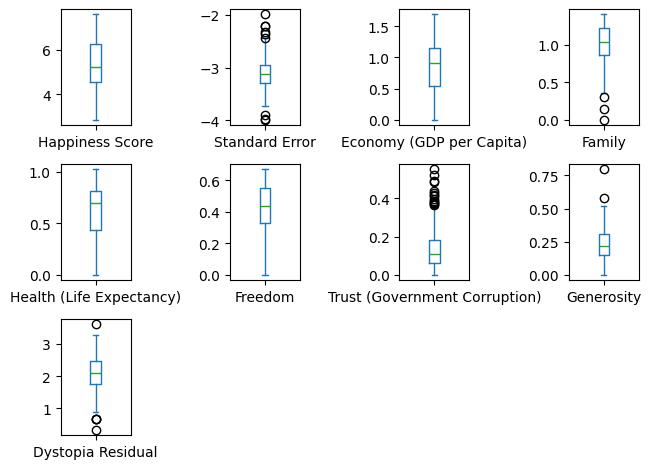

In [31]:
Happy_df.plot(kind='box', subplots= True, layout= (3,4))
plt.tight_layout()

# Machine Learning Algorithm

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [33]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state=43)
print('Training Feature matrix size:',X_train.shape)
print('Training target vector size:', Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('test target vector size:',Y_test.shape)

Training Feature matrix size: (105, 8)
Training target vector size: (105,)
Test feature matrix size: (53, 8)
test target vector size: (53,)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [35]:
maxR2_score = 0
maxRS = 0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred= lin_reg.predict(X_test)
    R2= r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print("Best accuracy is", maxR2_score, "On Random_state", maxRS)

Best accuracy is 0.999999955318454 On Random_state 148


In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=148)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred = lin_reg.predict(X_test)
print('Predicted result price:\n', y_pred)
print('\n')
print('actual price\n',Y_test)

Predicted result price:
 [4.19435462 4.51783157 6.8101893  5.01306089 4.50719926 4.27067703
 7.5270131  6.78615758 6.79779076 4.89757075 4.076767   6.75010255
 3.89660894 3.66726541 7.22558074 5.832712   5.98708888 4.85766282
 5.87825745 4.56464368 7.28598539 6.93731965 5.70878587 6.66962698
 6.29813718 2.83894048 3.68090087 5.05722719 3.34000395 3.67770984
 3.98885057 5.8282158  3.93080562 4.86720704 7.19975796 4.30691724
 7.18722252 3.00638777 7.27763061 4.8759534  6.26918541 5.47698043
 4.97110319 7.52214256 3.84497171 6.41123729 6.12268394 4.33217718
 4.9487715  4.67744738 5.75859498 6.98252597 5.39865551]


actual price
 134    4.194
118    4.518
22     6.810
91     5.013
122    4.507
131    4.271
2      7.527
24     6.786
23     6.798
96     4.898
135    4.077
25     6.750
142    3.896
148    3.667
11     7.226
55     5.833
45     5.987
101    4.857
52     5.878
116    4.565
8      7.286
18     6.937
64     5.709
26     6.670
37     6.298
157    2.839
146    3.681
90     5.057
15


# Linear Regression Evaluation Matrix

In [37]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :',mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m]'+'R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred))

 Error :
Mean absolute error : 0.00023306649408846492
Mean squared error : 7.582563994819683e-08
Root Mean Squared Error : 0.0002753645582644884


]R2 Score :
0.999999955318454


# Applying other Regression Model

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [39]:
rf = RandomForestRegressor(n_estimators = 100 )
svr=SVR()
dtc =DecisionTreeRegressor()
ad = AdaBoostRegressor()

model = [rf, svr,dtc,ad]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    
    print('\033[1m'+' Error of', m, ':'+'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')
    
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('\n')

 Error of RandomForestRegressor() :
Mean absolute error : 0.3983367924528306
Mean squared error : 0.2642197045226418
Root Mean Squared error: 0.5140230583569592


 R2 Score :
0.8443040521037164


 Error of SVR() :
Mean absolute error : 0.13984156840268566
Mean squared error : 0.05213341416923217
Root Mean Squared error: 0.22832742754481375


 R2 Score :
0.9692795003657549


 Error of DecisionTreeRegressor() :
Mean absolute error : 0.4911886792452829
Mean squared error : 0.3715898301886794
Root Mean Squared error: 0.6095816845908999


 R2 Score :
0.781034382184438


 Error of AdaBoostRegressor() :
Mean absolute error : 0.4755993190570978
Mean squared error : 0.351018995428925
Root Mean Squared error: 0.5924685607092793


 R2 Score :
0.7931560959026642




"We can see that Linear Regression Model Gives us maximum R2 Score"

# Cross Validation

In [40]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X,Y,cv=5)
print('\033[1m'+'cross validation score:'+'\033[0m\n')
print("Score:",score)
print("Mean Score:",score.mean())
print("Std deviation:", score.std())

cross validation score:

Score: [0.99999945 0.99999834 0.99999836 0.99999535 0.99999943]
Mean Score: 0.9999981871007761
Std deviation: 1.4991023001111373e-06


# Saving Model

In [41]:
import joblib
joblib.dump(lin_reg,'lin_reg.obj')

['lin_reg.obj']